In [23]:
from project_1.library.tally import *
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import SGDClassifier

from xgboost import XGBClassifier

from sklearn.ensemble import VotingClassifier
from tpot import TPOTClassifier
import shap

from sklearn.metrics import classification_report

In [43]:
df_train = pd.read_csv('../data/for_modelling/credit_score_train.csv')
df_val = pd.read_csv('../data/for_modelling/credit_score_valid.csv')

df_train=map_gambling(df_train)
df_train = remove_columns_with_high_correlation(df_train)
df_train = automatic_remove_outliers(df_train)
X_train, y_train = split_x_from_y(df_train)

#X_train, y_train=prepare_data(df_train)
df_val=map_gambling(df_val)
df_val = remove_columns_with_high_correlation(df_val)
X_val, y_val = split_x_from_y(df_val)

# Komitety

In [44]:

model1 = DecisionTreeClassifier(random_state=1)
model2 = KNeighborsClassifier()
model3 = LogisticRegression(random_state=1, max_iter=1000)
model5 = RandomForestClassifier(random_state=1)
model6 = GradientBoostingClassifier(random_state=1)
model8 = GaussianNB()


estimators=[('DecisionTree', model1), ('KNN', model2), ('LR', model3),  ('RandomForest', model5),
            ('GradientBoosting', model6),
            ('NaiveBayes', model8)]

from sklearn.ensemble import VotingClassifier
model_hard = VotingClassifier(estimators=estimators, voting='hard')

In [45]:
from sklearn.metrics import classification_report

model_hard.fit(X_train,y_train)

y_hat = model_hard.predict(X_val)
print('f1 score: ', f1_score(y_val, y_hat))

print('model.score: ', model_hard.score(X_val,y_val))
report = classification_report(y_val, y_hat)
print(report)

/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


f1 score:  0.2222222222222222
model.score:  0.6956521739130435
              precision    recall  f1-score   support

           0       0.73      0.91      0.81        99
           1       0.40      0.15      0.22        39

    accuracy                           0.70       138
   macro avg       0.57      0.53      0.52       138
weighted avg       0.64      0.70      0.64       138


In [46]:
model_soft = VotingClassifier(estimators=estimators, voting='soft')
model_soft.fit(X_train, y_train)

y_hat = model_soft.predict(X_val)
f1_score(y_val, y_hat)
report = classification_report(y_val, y_hat)
print(report)

/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       0.73      0.91      0.81        99
           1       0.40      0.15      0.22        39

    accuracy                           0.70       138
   macro avg       0.57      0.53      0.52       138
weighted avg       0.64      0.70      0.64       138


In [47]:
model_soft = VotingClassifier(estimators=estimators, voting='soft', weights=[0.1, 0.1, 0.3, 0.3, 0.1,0.2])
model_soft.fit(X_train, y_train)

y_hat = model_soft.predict(X_val)
report = classification_report(y_val, y_hat)
print(report)

/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       0.74      0.91      0.81        99
           1       0.44      0.18      0.25        39

    accuracy                           0.70       138
   macro avg       0.59      0.54      0.53       138
weighted avg       0.65      0.70      0.66       138


# Stacking

In [49]:
from sklearn.ensemble import StackingClassifier
clf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
clf.fit(X_train, y_train).score(X_val, y_val)
y_hat = clf.predict(X_val)
report = classification_report(y_val, y_hat)
print(report)

/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

              precision    recall  f1-score   support

           0       0.74      0.93      0.83        99
           1       0.50      0.18      0.26        39

    accuracy                           0.72       138
   macro avg       0.62      0.55      0.54       138
weighted avg       0.67      0.72      0.67       138


In [50]:
from sklearn.ensemble import BaggingClassifier
clf = BaggingClassifier(estimator=model5
                        ,n_estimators=10, random_state=0)
clf.fit(X_train, y_train)
y_hat = clf.predict(X_val)
report = classification_report(y_val, y_hat)
print(report)

              precision    recall  f1-score   support

           0       0.74      0.91      0.81        99
           1       0.44      0.18      0.25        39

    accuracy                           0.70       138
   macro avg       0.59      0.54      0.53       138
weighted avg       0.65      0.70      0.66       138


In [51]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(n_estimators=1000, # Ilość słabych estymatorów
                                  max_depth=3, # Maksymalna wysokość drzewa w słabym estymatorze
                                  min_samples_split = 2, # Minimalna ilość obserwacji wymagana do podziału węzła
                                  max_features = 3, # Maksymalna ilość zmiennych brana pod uwagę przy podziale węzła
                                  random_state=0,
                                  n_jobs = -1)
model_rf.fit(X_train, y_train)
y_hat = model_rf.predict(X_val)
report = classification_report(y_val, y_hat)
print(report)

              precision    recall  f1-score   support

           0       0.72      0.99      0.83        99
           1       0.50      0.03      0.05        39

    accuracy                           0.72       138
   macro avg       0.61      0.51      0.44       138
weighted avg       0.66      0.72      0.61       138


In [52]:
from sklearn.ensemble import AdaBoostClassifier

model = AdaBoostClassifier(random_state=1)
model.fit(X_train, y_train)
y_hat = model.predict(X_val)
report = classification_report(y_val, y_hat)
print(report)

              precision    recall  f1-score   support

           0       0.75      0.81      0.78        99
           1       0.41      0.33      0.37        39

    accuracy                           0.67       138
   macro avg       0.58      0.57      0.57       138
weighted avg       0.66      0.67      0.66       138


/opt/homebrew/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [54]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier(random_state=1,
                                   learning_rate=0.01)
model.fit(X_train, y_train)
y_hat = model.predict(X_val)
report = classification_report(y_val, y_hat)
print(report)

              precision    recall  f1-score   support

           0       0.74      0.96      0.84        99
           1       0.60      0.15      0.24        39

    accuracy                           0.73       138
   macro avg       0.67      0.56      0.54       138
weighted avg       0.70      0.73      0.67       138


In [55]:
from xgboost import XGBClassifier
model=XGBClassifier(random_state=1,
                    learning_rate=0.01, # Szybkość "uczenia" się
                    booster='gbtree', # Jaki model wykorzystujemy (drzewo - gbtree, liniowe - gblinear)
                    max_depth=4 # Maksymalna głębokość drzewa 
                    )
model.fit(X_train, y_train)
y_hat = model.predict(X_val)
report = classification_report(y_val, y_hat)
print(report)

              precision    recall  f1-score   support

           0       0.74      0.96      0.83        99
           1       0.56      0.13      0.21        39

    accuracy                           0.72       138
   macro avg       0.65      0.54      0.52       138
weighted avg       0.69      0.72      0.66       138


In [56]:
model=XGBClassifier(random_state=1,
                    learning_rate=0.01, # Szybkość "uczenia" się
                    booster='gblinear', # Jaki model wykorzystujemy (drzewo - gbtree, liniowe - gblinear)
                    max_depth=5 # Maksymalna głębokość drzewa 
                    )
model.fit(X_train, y_train)
y_hat = model.predict(X_val)
report = classification_report(y_val, y_hat)
print(report)

              precision    recall  f1-score   support

           0       0.72      0.94      0.82        99
           1       0.33      0.08      0.12        39

    accuracy                           0.70       138
   macro avg       0.53      0.51      0.47       138
weighted avg       0.61      0.70      0.62       138


/opt/homebrew/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [13:57:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_depth" } are not used.

  warnings.warn(smsg, UserWarning)


In [58]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
level0 = [
    ('lr', LogisticRegression()),
    ('svc', SVC()),
    ('dt', DecisionTreeClassifier())
]
# Meta-model, który podsumowuje przewidywania bazowych modeli
level1 = LogisticRegression()

# Defining the stacking model
model_stacking = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
# fitting stacking and evaluating
model_stacking.fit(X_train, y_train)
y_hat = model.predict(X_val)
report = classification_report(y_val, y_hat)
print(report)

/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

              precision    recall  f1-score   support

           0       0.72      0.94      0.82        99
           1       0.33      0.08      0.12        39

    accuracy                           0.70       138
   macro avg       0.53      0.51      0.47       138
weighted avg       0.61      0.70      0.62       138


# Strojenie Parametrów
### Decision Tree

In [59]:
tree_model= DecisionTreeClassifier()
from sklearn.model_selection import GridSearchCV
max_depth=[3, 5, 6, 7, 8]
criterion=["gini","entrophy"]
ccp_alpha=[0,0.01, 0.02, 0.05, 0.1, 0.2]
splitter=["best", "random"]
min_samples_split=[2, 5, 10]
min_samples_leaf=[1, 2, 4]
max_features=["auto", "sqrt", "log2"]

param_grid = {
    'criterion': criterion,
    'splitter': splitter,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
    'ccp_alpha': ccp_alpha,
    'max_features': max_features,
}

grid = GridSearchCV(estimator=tree_model, param_grid=param_grid, cv = 3, n_jobs=-1, scoring='f1')

grid_result = grid.fit(X_train, y_train) #tutaj lepiej zastosować tylko trainset

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.407453 using {'ccp_alpha': 0, 'criterion': 'gini', 'max_depth': 8, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'splitter': 'best'}


/opt/homebrew/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
6480 fits failed out of a total of 9720.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
995 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/homebrew/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py", line 1467, in wrapper
    estimator._validate_params()
  File "/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/opt/homebrew/lib/python3.11/site-pack

In [60]:
std_test_scores = grid_result.cv_results_['std_test_score']
mean_test_scores = grid_result.cv_results_['mean_test_score']
parameters = grid_result.cv_results_['params']

for mean_test, std_test, params in zip(mean_test_scores, std_test_scores, parameters):
    print('Parameters : {}'.format(params))
    print('Mean test score: {:.8f}'.format(mean_test))
    print('Standard Deviation (test) : {:.8f}'.format(std_test))
    print()

print('Best parameters : {}'.format(grid_result.best_params_))
print('Best accuracy score : {:.8f}'.format(grid_result.best_score_))


Parameters : {'ccp_alpha': 0, 'criterion': 'gini', 'max_depth': 3, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}
Mean test score: nan
Standard Deviation (test) : nan

Parameters : {'ccp_alpha': 0, 'criterion': 'gini', 'max_depth': 3, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'random'}
Mean test score: nan
Standard Deviation (test) : nan

Parameters : {'ccp_alpha': 0, 'criterion': 'gini', 'max_depth': 3, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 5, 'splitter': 'best'}
Mean test score: nan
Standard Deviation (test) : nan

Parameters : {'ccp_alpha': 0, 'criterion': 'gini', 'max_depth': 3, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 5, 'splitter': 'random'}
Mean test score: nan
Standard Deviation (test) : nan

Parameters : {'ccp_alpha': 0, 'criterion': 'gini', 'max_depth': 3, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 10, 'splitter

In [61]:
best_model=grid_result.best_estimator_
best_model

DecisionTreeClassifier(ccp_alpha=0, max_depth=8, max_features='sqrt',
                       min_samples_split=10)

In [62]:
best_model.score(X_val, y_val)

0.6521739130434783

In [64]:
best_model.fit(X_train, y_train)
y_hat = best_model.predict(X_val)
report = classification_report(y_val, y_hat)
print(report)

              precision    recall  f1-score   support

           0       0.73      0.74      0.73        99
           1       0.32      0.31      0.31        39

    accuracy                           0.62       138
   macro avg       0.52      0.52      0.52       138
weighted avg       0.61      0.62      0.61       138


# Gradient Boosting

In [67]:
max_depth = [3, 5, 6, 7, 8]
loss = ["deviance", "exponential"]
learning_rate = [0.001, 0.01, 0.1]
n_estimators = [10, 50, 100, 200]
subsample = [0.5, 0.75, 1.0]
max_features = ["auto", "sqrt", "log2"]

param_grid = {
    'loss': loss,
    'learning_rate': learning_rate,
    'n_estimators': n_estimators,
    'subsample': subsample,
    'max_depth': max_depth,
    'max_features': max_features,
    'ccp_alpha': ccp_alpha
}
gb_model = GradientBoostingClassifier()

grid = GridSearchCV(estimator=gb_model, param_grid=param_grid, cv = 3, n_jobs=-1, scoring='f1')

grid_result = grid.fit(X_train, y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

/opt/homebrew/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
12960 fits failed out of a total of 19440.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1844 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/homebrew/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py", line 1467, in wrapper
    estimator._validate_params()
  File "/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/opt/homebrew/lib/python3.11/site-p

Best: 0.373501 using {'ccp_alpha': 0.01, 'learning_rate': 0.1, 'loss': 'exponential', 'max_depth': 8, 'max_features': 'log2', 'n_estimators': 200, 'subsample': 0.5}


In [68]:
grid_result.best_estimator_

GradientBoostingClassifier(ccp_alpha=0.01, loss='exponential', max_depth=8,
                           max_features='log2', n_estimators=200,
                           subsample=0.5)

In [69]:
y_hat=grid_result.predict(X_val)
report = classification_report(y_val, y_hat)
print(report)

              precision    recall  f1-score   support

           0       0.79      0.91      0.85        99
           1       0.62      0.38      0.48        39

    accuracy                           0.76       138
   macro avg       0.71      0.65      0.66       138
weighted avg       0.74      0.76      0.74       138


# Random Forest

In [70]:
max_depth = [3, 5, 6, 7, 8]
criterion = ["gini", "entropy"]
ccp_alpha = [0, 0.01, 0.02, 0.05, 0.1, 0.2]
max_features = ["auto", "sqrt", "log2"]
n_estimators = [10, 50, 100, 200]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

param_grid = {
    'n_estimators': n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
    'bootstrap': bootstrap,
    'criterion': criterion,
    'ccp_alpha': ccp_alpha
}

rf_model = RandomForestClassifier()

grid = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, n_jobs=-1, scoring='f1')

grid_result = grid.fit(X_train, y_train)

print("Best F1-score: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

/opt/homebrew/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
12960 fits failed out of a total of 38880.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
7703 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/homebrew/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py", line 1467, in wrapper
    estimator._validate_params()
  File "/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/opt/homebrew/lib/python3.11/site-p

Best F1-score: 0.402007 using {'bootstrap': False, 'ccp_alpha': 0, 'criterion': 'gini', 'max_depth': 8, 'max_features': 'log2', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 10}


/opt/homebrew/lib/python3.11/site-packages/sklearn/model_selection/_search.py:1051: UserWarning: One or more of the test scores are non-finite: [nan nan nan ...  0.  0.  0.]
  warnings.warn(


In [71]:
y_hat=grid_result.predict(X_val)
report = classification_report(y_val, y_hat)
print(report)

              precision    recall  f1-score   support

           0       0.72      0.87      0.79        99
           1       0.32      0.15      0.21        39

    accuracy                           0.67       138
   macro avg       0.52      0.51      0.50       138
weighted avg       0.61      0.67      0.62       138


In [72]:
from tpot import TPOTClassifier
tpot = TPOTClassifier(generations=5, population_size=50, verbosity=2, random_state=42)
result = tpot.fit(X_train, y_train)

Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.7319148936170212

Generation 2 - Current best internal CV score: 0.7446808510638298

Generation 3 - Current best internal CV score: 0.7446808510638298

Generation 4 - Current best internal CV score: 0.7446808510638298

Generation 5 - Current best internal CV score: 0.7446808510638298

Best pipeline: LinearSVC(input_matrix, C=10.0, dual=False, loss=squared_hinge, penalty=l2, tol=1e-05)


In [73]:
print("Accuracy on testing data: ", tpot.score(X_val, y_val))
model=result.best_estimator_
y_hat=model.predict(X_val)
report = classification_report(y_val, y_hat)
print(report)

Accuracy on testing data:  0.7101449275362319


AttributeError: 'TPOTClassifier' object has no attribute 'best_estimator_'

# Cross Validation - Second Part

In [2]:
#load data
df_train = pd.read_csv('../data/for_modelling/credit_score_train.csv')
df_val = pd.read_csv('../data/for_modelling/credit_score_valid.csv')

df_train=map_gambling(df_train)
# I have problem with automatic_remove_outliers

X_train, y_train = split_x_from_y(df_train)
X_train=remove_columns_with_high_correlation(X_train)


df_val=map_gambling(df_val)

X_val, y_val = split_x_from_y(df_val)
X_val=remove_columns_with_high_correlation(X_val)

#defining models
model1 = DecisionTreeClassifier(random_state=1)
model2 = KNeighborsClassifier()
model3 = LogisticRegression(random_state=1, max_iter=1000)
model5 = RandomForestClassifier(random_state=1)
model6 = GradientBoostingClassifier(random_state=1)
model8 = GaussianNB()

estimators=[('DecisionTree', model1), ('KNN', model2), ('LR', model3),  ('RandomForest', model5),
            ('GradientBoosting', model6),
            ('NaiveBayes', model8)]

#defining voting classifier
model_voting = VotingClassifier(estimators=estimators, voting='soft', weights=[0.1, 0.1, 0.3, 0.3, 0.1,0.2])

names=['RandomForestClassifier', 'DesicionTreeClassifier',
       'GaussianNB', 'LogisticRegression', 'XGBClassifier', 'GradientBoostingClassifier', 'SoftVotingClassifier']


models=[RandomForestClassifier(random_state=42), DecisionTreeClassifier(ccp_alpha=0,criterion='gini',max_depth=7, max_features='sqrt',min_samples_leaf=4,min_samples_split=5,splitter='best'), GaussianNB(var_smoothing=1e-05), LogisticRegression(random_state=42), XGBClassifier(random_state=42, learning_rate=0.01, booster='gbtree', max_depth=4),
        GradientBoostingClassifier(random_state=42, learning_rate=0.1, loss='exponential', max_depth=3, max_features='sqrt', n_estimators=100, subsample=0.5), model_voting]

s=create_tally(X_train, X_val, y_train, y_val, models=models, names=names)
s

/opt/homebrew/lib/python3.11/site-packages/numpy/core/_methods.py:239: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/opt/homebrew/lib/python3.11/site-packages/numpy/core/_methods.py:250: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims, where=where)
/opt/homebrew/lib/python3.11/site-packages/numpy/core/_methods.py:239: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/opt/homebrew/lib/python3.11/site-packages/numpy/core/_methods.py:239: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/opt/homebrew/lib/python3.11/site-packages/numpy/core/_methods.py:250: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims, where=where)
/opt/homebrew/lib/python3.11/site-packages/numpy/core/_methods.py:239: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/opt/homebrew/lib/pyth

model  accuracy  accuracy_std  precision  \
0      RandomForestClassifier  0.722908      0.040631   0.534466   
0      DesicionTreeClassifier  0.684635      0.048614   0.416017   
0                  GaussianNB  0.495225      0.049051   0.336437   
0          LogisticRegression  0.702159      0.036853   0.450324   
0               XGBClassifier  0.727683      0.036433   0.629841   
0  GradientBoostingClassifier  0.710159      0.037560   0.464673   
0        SoftVotingClassifier  0.684686      0.043513   0.428212   

   precision_std    recall  recall_std        f1    f1_std  
0       0.208728  0.179841    0.075293  0.268335  0.109010  
0       0.120260  0.292222    0.117151  0.339191  0.115783  
0       0.024289  0.792540    0.061206  0.471381  0.028065  
0       0.123952  0.263333    0.088167  0.331039  0.100687  
0       0.296587  0.123492    0.058368  0.205325  0.096108  
0       0.148513  0.240952    0.098681  0.315401  0.116191  
0       0.104587  0.375873    0.109952  0.399207  0.107414

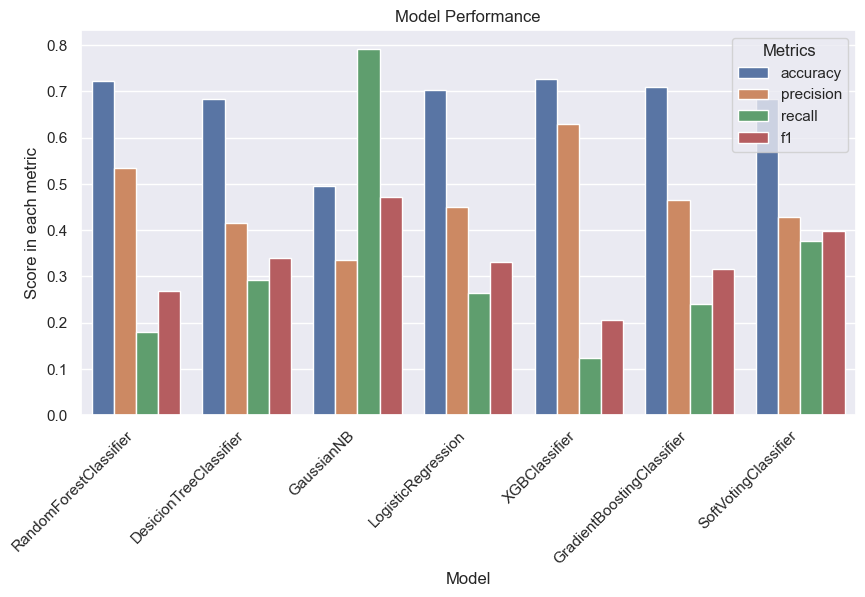

In [3]:
create_visualization(s)

# Test our models using test set

In [5]:
df_test=pd.read_csv('../data/for_modelling/credit_score_test.csv')

df_test=map_gambling(df_test)
X_test, y_test = split_x_from_y(df_test)
X_test=remove_columns_with_high_correlation(X_test)

score=validate(X_train, X_test, y_train, y_test, models, names)
score

model  accuracy  precision    recall        f1
0      RandomForestClassifier  0.763889   0.833333  0.238095  0.370370
0      DesicionTreeClassifier  0.694444   0.428571  0.142857  0.214286
0                  GaussianNB  0.472222   0.333333  0.809524  0.472222
0          LogisticRegression  0.680556   0.416667  0.238095  0.303030
0               XGBClassifier  0.750000   0.800000  0.190476  0.307692
0  GradientBoostingClassifier  0.750000   0.714286  0.238095  0.357143
0        SoftVotingClassifier  0.722222   0.538462  0.333333  0.411765

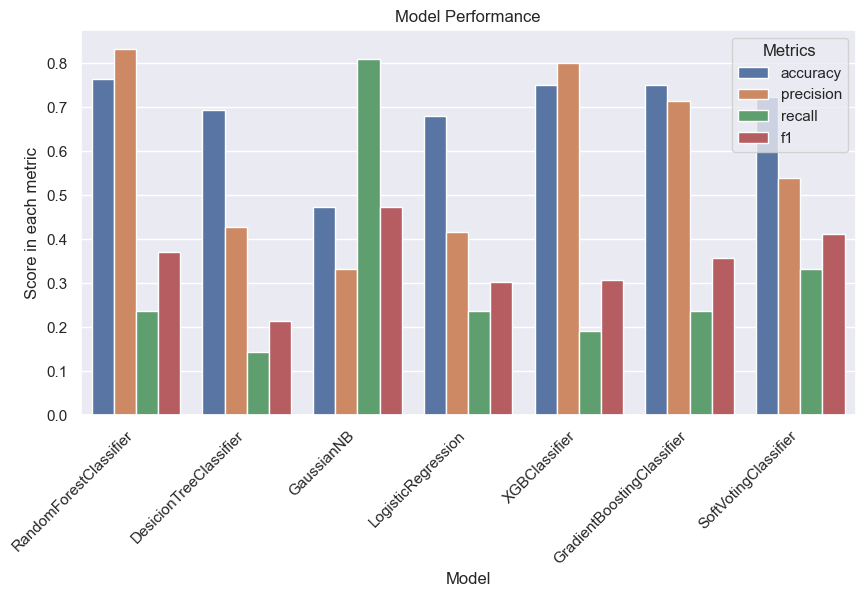

In [6]:
create_visualization(score)

## Explanable AI - 3rd Part

In [10]:
df_train = pd.read_csv('../data/for_modelling/credit_score_train.csv')
df_val = pd.read_csv('../data/for_modelling/credit_score_valid.csv')


df_train=map_gambling(df_train)
df_train = remove_columns_with_high_correlation(df_train)
X_train, y_train = split_x_from_y(df_train)

#X_train, y_train=prepare_data(df_train)
df_val=map_gambling(df_val)
df_val = remove_columns_with_high_correlation(df_val)
X_val, y_val = split_x_from_y(df_val)

model_xgboost=XGBClassifier(random_state=1,learning_rate=0.01,booster='gbtree',max_depth=4)
model_xgboost.fit(X_train, y_train)
y_hat=model_xgboost.predict(X_val)
report = classification_report(y_val, y_hat)
print(report)


              precision    recall  f1-score   support

           0       0.75      0.95      0.84        99
           1       0.58      0.18      0.27        39

    accuracy                           0.73       138
   macro avg       0.66      0.56      0.56       138
weighted avg       0.70      0.73      0.68       138


In [11]:
X_val

INCOME  SAVINGS     DEBT  R_SAVINGS_INCOME  R_DEBT_INCOME  \
0     15221     3044        0            0.2000         0.0000   
1    169063   783839  1859697            4.6364        11.0000   
2     70477    56382   288956            0.8000         4.1000   
3     72542    87050   696403            1.2000         9.6000   
4     84772   254315   952051            3.0000        11.2307   
..      ...      ...      ...               ...            ...   
133  386976  1250231   654883            3.2308         1.6923   
134   16772     8386        0            0.5000         0.0000   
135  137509   206264   206264            1.5000         1.5000   
136  259146  1922000  1662854            7.4167         6.4167   
137   56657   442952    51506            7.8181         0.9091   

     R_DEBT_SAVINGS  T_CLOTHING_6  R_CLOTHING  R_CLOTHING_INCOME  \
0            0.0000            75      0.3846             0.0128   
1            2.3725         14437      0.8472             0.1008   
2            5.1250         11140      0.7181             0.2201   
3            8.0000          4094      0.6141             0.0919   
4            3.7436           379      0.0427             0.1047   
..              ...           ...         ...                ...   
133          0.5238         30569      0.8337             0.0947   
134          0.0000           186      0.7815             0.0142   
135          1.0000         10865      0.6938             0.1139   
136          0.8652          8527      0.7001             0.0470   
137          0.1163           289      0.2664             0.0192   

     R_CLOTHING_SAVINGS  ...  R_EXPENDITURE_INCOME  R_EXPENDITURE_SAVINGS  \
0                0.0641  ...                1.0000                 5.0003   
1                0.0217  ...                0.9091                 0.1961   
2                0.2751  ...                1.0000                 1.2500   
3                0.0766  ...                1.0000                 0.8333   
4                0.0349  ...                0.7692                 0.2564   
..                  ...  ...                   ...                    ...   
133              0.0293  ...                0.7692                 0.2381   
134              0.0284  ...                1.2500                 2.5000   
135              0.0759  ...                1.0000                 0.6667   
136              0.0063  ...                0.8333                 0.1124   
137              0.0024  ...                0.9091                 0.1163   

     R_EXPENDITURE_DEBT  CAT_GAMBLING  CAT_DEBT  CAT_CREDIT_CARD  \
0                0.0000             0         0                0   
1                0.0826             2         1                1   
2                0.2439             0         1                0   
3                0.1042             0         1                0   
4                0.0685             0         1                0   
..                  ...           ...       ...              ...   
133              0.4545             0         1                0   
134              0.9786             0         0                0   
135              0.6667             0         1                0   
136              0.1299             2         1                1   
137              1.0000             0         1                0   

     CAT_MORTGAGE  CAT_SAVINGS_ACCOUNT  CAT_DEPENDENTS  CREDIT_SCORE  
0               0                    1               0           645  
1               0                    1               1           547  
2               0                    1               0           606  
3               1                    1               0           585  
4               0                    1               0           548  
..            ...                  ...             ...           ...  
133             0                    1               0           562  
134             0                    1               0           619  
135           

In [12]:
X_train

INCOME  SAVINGS     DEBT  R_SAVINGS_INCOME  R_DEBT_INCOME  \
0      2783     1855        0            0.6665         0.0000   
1    314430   445442   707468            1.4167         2.2500   
2    161773   517674  2782496            3.2000        17.2000   
3     16014    97685    20818            6.1000         1.3000   
4    193225  1410542  2589215            7.3000        13.4000   
..      ...      ...      ...               ...            ...   
485   20007    22508   457665            1.1250        22.8752   
486   20846   268679    23162           12.8888         1.1111   
487   89235  1106514   160623           12.4000         1.8000   
488  197073  1021195  1863233            5.1818         9.4545   
489  133592    85013   680103            0.6364         5.0909   

     R_DEBT_SAVINGS  T_CLOTHING_6  R_CLOTHING  R_CLOTHING_INCOME  \
0            0.0000            74      0.7184             0.0370   
1            1.5882         29157      0.8131             0.1141   
2            5.3750          2533      0.6816             0.0230   
3            0.2131           187      0.2936             0.0398   
4            1.8356          2325      0.4407             0.0273   
..              ...           ...         ...                ...   
485         20.3334           861      0.5934             0.0725   
486          0.0862           533      0.4094             0.0625   
487          0.1452           835      0.3460             0.0270   
488          1.8246          3948      0.4691             0.0427   
489          8.0000           264      0.0212             0.0934   

     R_CLOTHING_SAVINGS  ...  R_EXPENDITURE_INCOME  R_EXPENDITURE_SAVINGS  \
0                0.0555  ...                1.6665                 2.5003   
1                0.0805  ...                0.8333                 0.5882   
2                0.0072  ...                1.0000                 0.3125   
3                0.0065  ...                1.0000                 0.1639   
4                0.0037  ...                1.0000                 0.1370   
..                  ...  ...                   ...                    ...   
485              0.0645  ...                1.2500                 1.1111   
486              0.0048  ...                1.1111                 0.0862   
487              0.0022  ...                1.0000                 0.0806   
488              0.0082  ...                0.9091                 0.1754   
489              0.1468  ...                0.9091                 1.4286   

     R_EXPENDITURE_DEBT  CAT_GAMBLING  CAT_DEBT  CAT_CREDIT_CARD  \
0                0.0000             0         0                0   
1                0.3704             2         1                0   
2                0.0581             0         1                1   
3                0.7692             0         1                0   
4                0.0746             0         1                1   
..                  ...           ...       ...              ...   
485              0.0546             0         1                0   
486              1.0000             1         1                0   
487              0.5556             0         1                0   
488              0.0962             2         1                0   
489              0.1786             2         1                0   

     CAT_MORTGAGE  CAT_SAVINGS_ACCOUNT  CAT_DEPENDENTS  CREDIT_SCORE  
0               0                    1               0           570  
1               1                    1               0           691  
2               1                    1               1           520  
3               0                    1               0           654  
4               0                    1               1           552  
..            ...                  ...             ...           ...  
485             0                    1               0           423  
486             0                    1               0           584  
487           

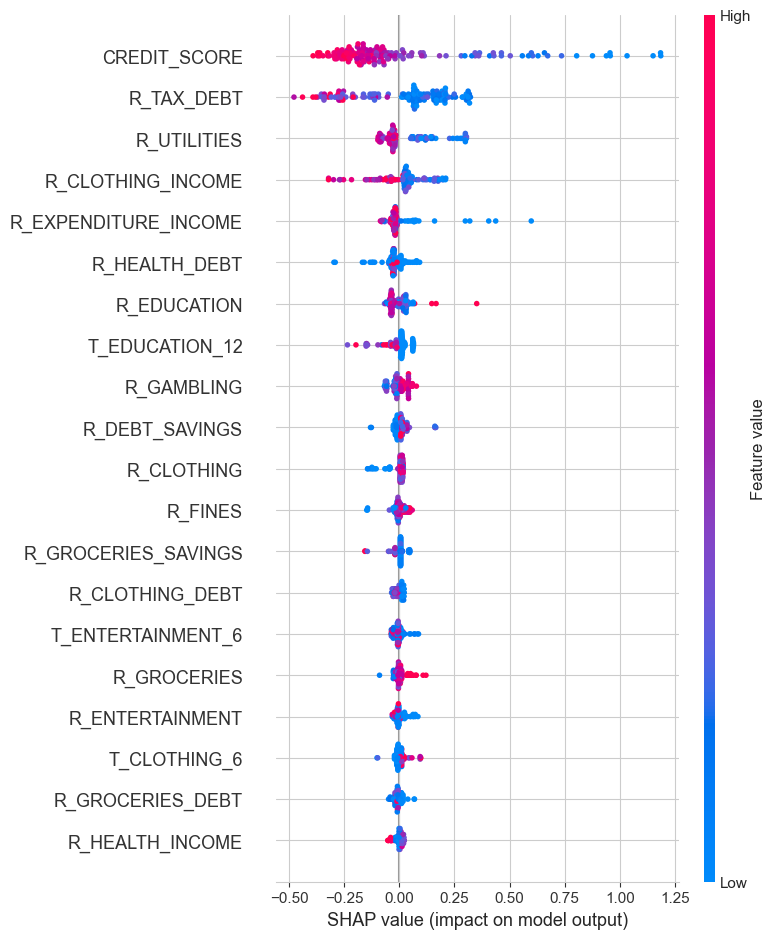

In [14]:
explainer_shap_xgboost = shap.TreeExplainer(model_xgboost)
shap_values_xgboost = explainer_shap_xgboost.shap_values(X_val)
col=X_val.columns
shap.summary_plot(shap_values_xgboost, X_val, col)

Conslusions and explanations:
- features are listed from top to bottom based on their impact on the model output. The most important features have the greatest influence on model predictions. We can see CREDIT_SCORE is the most important and it would seem resonable.
- the color represents the feature value (red high, blue low). For example, we can see that the higher the CREDIT_SCORE, the lower the probability of default.
- the horizontal spread of the dots shows the distribution of the feature impact on the model. A wider spread means the impact of that feature on the predictions varies more among different observations.

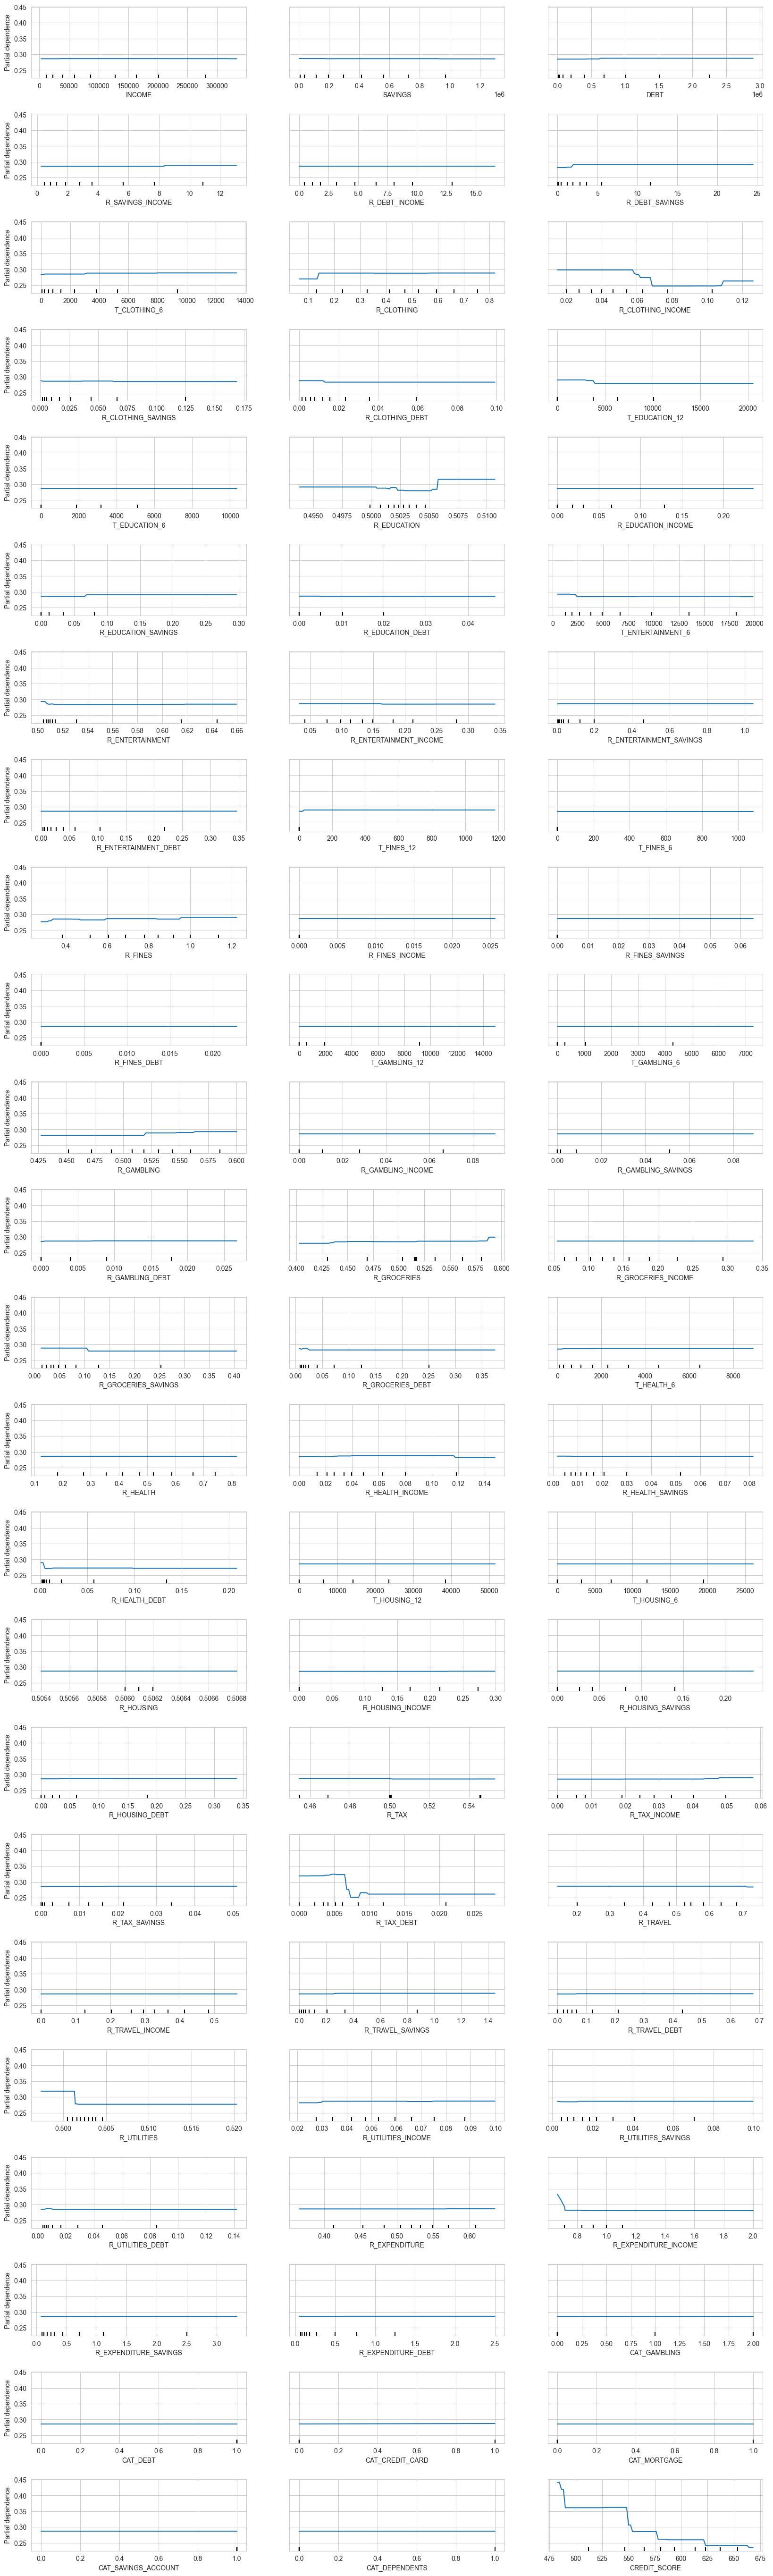

In [16]:
from sklearn.inspection import PartialDependenceDisplay
fig, ax = plt.subplots(figsize=(20, 70))
PartialDependenceDisplay.from_estimator(model_xgboost, X_train, features=list(range(72)), feature_names=col, ax=ax)
plt.subplots_adjust(hspace=0.5)

Conslusions:
- the most important feature is CREDIT_SCORE, which is consistent with SHAP (SHAP and PDP showed that the higher the CREDIT_SCORE, the lower the probability of default).
- there are many features that have a marginal impact on the model output and only few with bigger impact (like R_EDUCATION nad R_CLOTHING_INCOME, but these still isn't big impact on the model olutput).

In [17]:
model_naive_bayes = GaussianNB(var_smoothing=1e-05)
model_naive_bayes.fit(X_train, y_train)

GaussianNB(var_smoothing=1e-05)

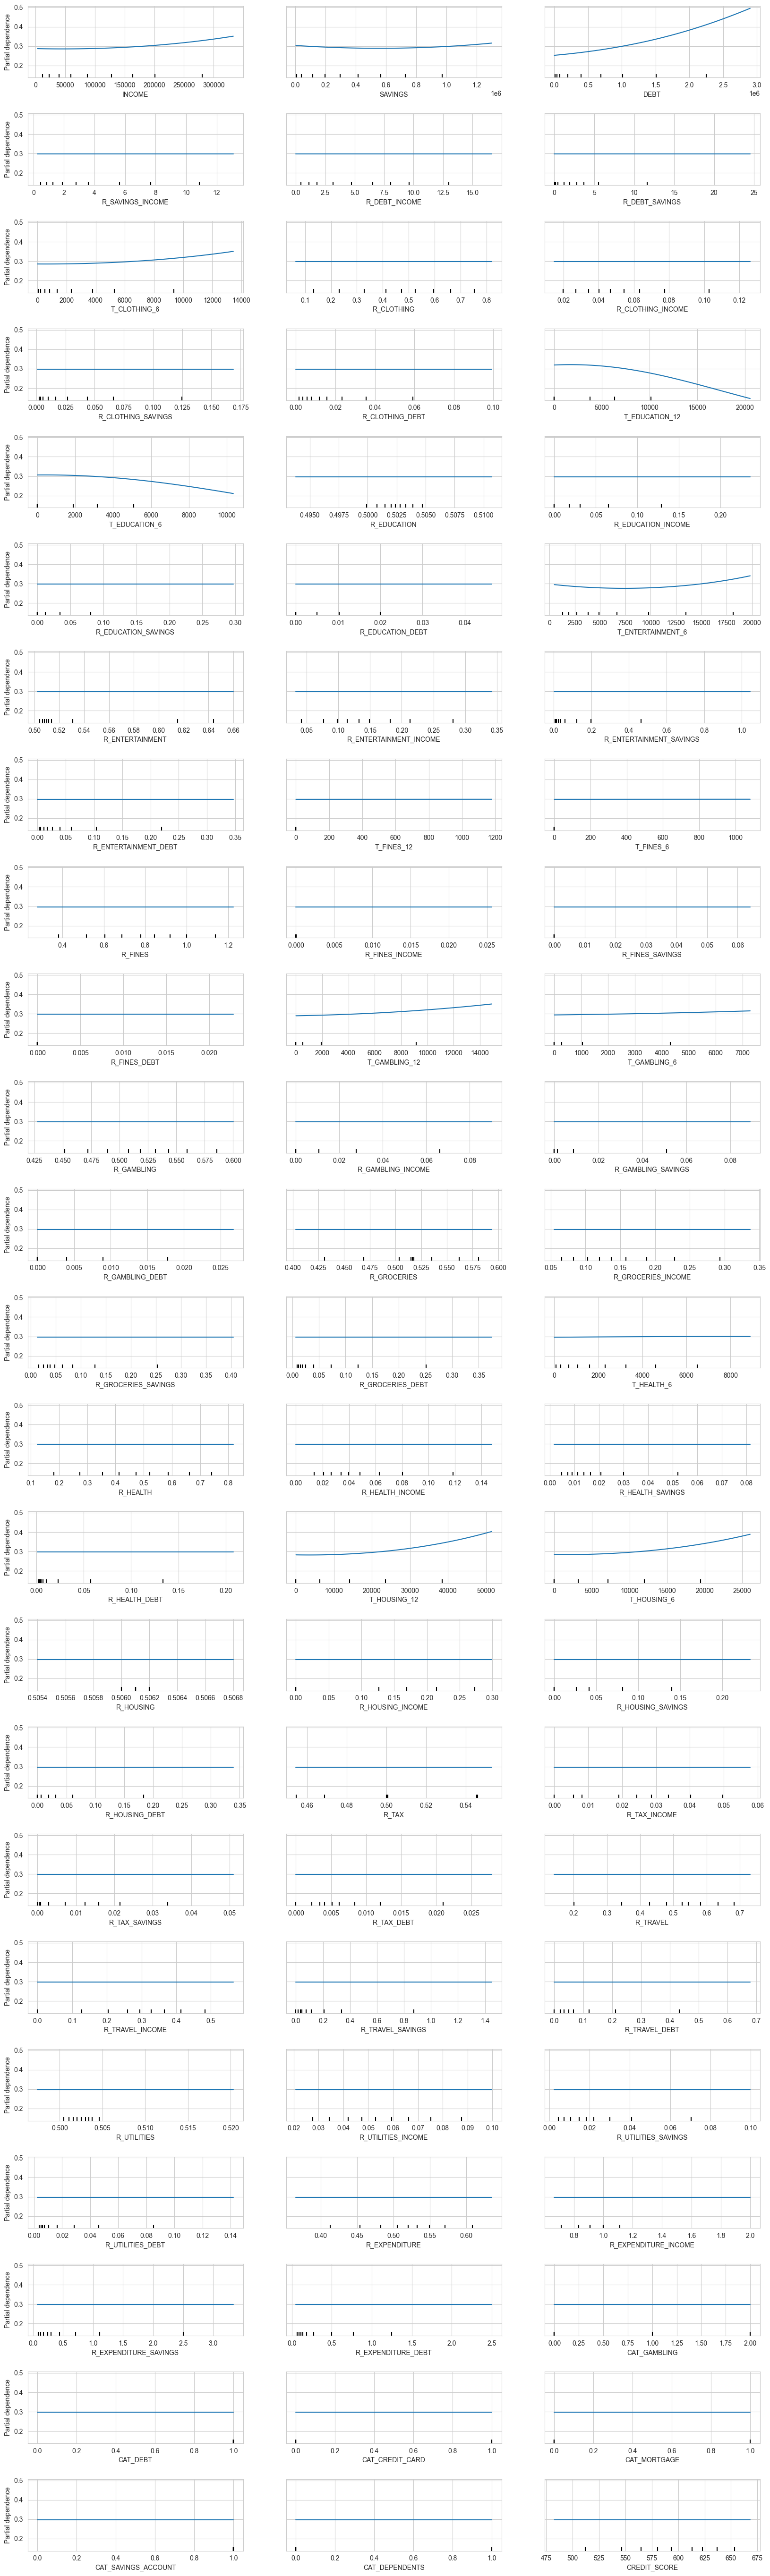

In [21]:
fig, ax = plt.subplots(figsize=(20, 70))
PartialDependenceDisplay.from_estimator(model_naive_bayes, X_train, features=list(range(72)), feature_names=col, ax=ax)
plt.subplots_adjust(hspace=0.5)

Conslusions:
- there are more linaer relationships between features and the model output than in the case of XGBoost.
- there are a lot of features (most of them) that have a marginal impact on the model output, only few has like any noticeable impact
- on the contrary to XGBoost, the most important feature is not CREDIT_SCORE, but CAT_SAVINGS_ACCOUNT.

Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.7428571428571429

Generation 2 - Current best internal CV score: 0.7428571428571429

Generation 3 - Current best internal CV score: 0.742857142857143

Generation 4 - Current best internal CV score: 0.7510204081632653

Generation 5 - Current best internal CV score: 0.7510204081632653

Best pipeline: ExtraTreesClassifier(GaussianNB(input_matrix), bootstrap=True, criterion=gini, max_features=0.7500000000000001, min_samples_leaf=12, min_samples_split=13, n_estimators=100)


X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have 

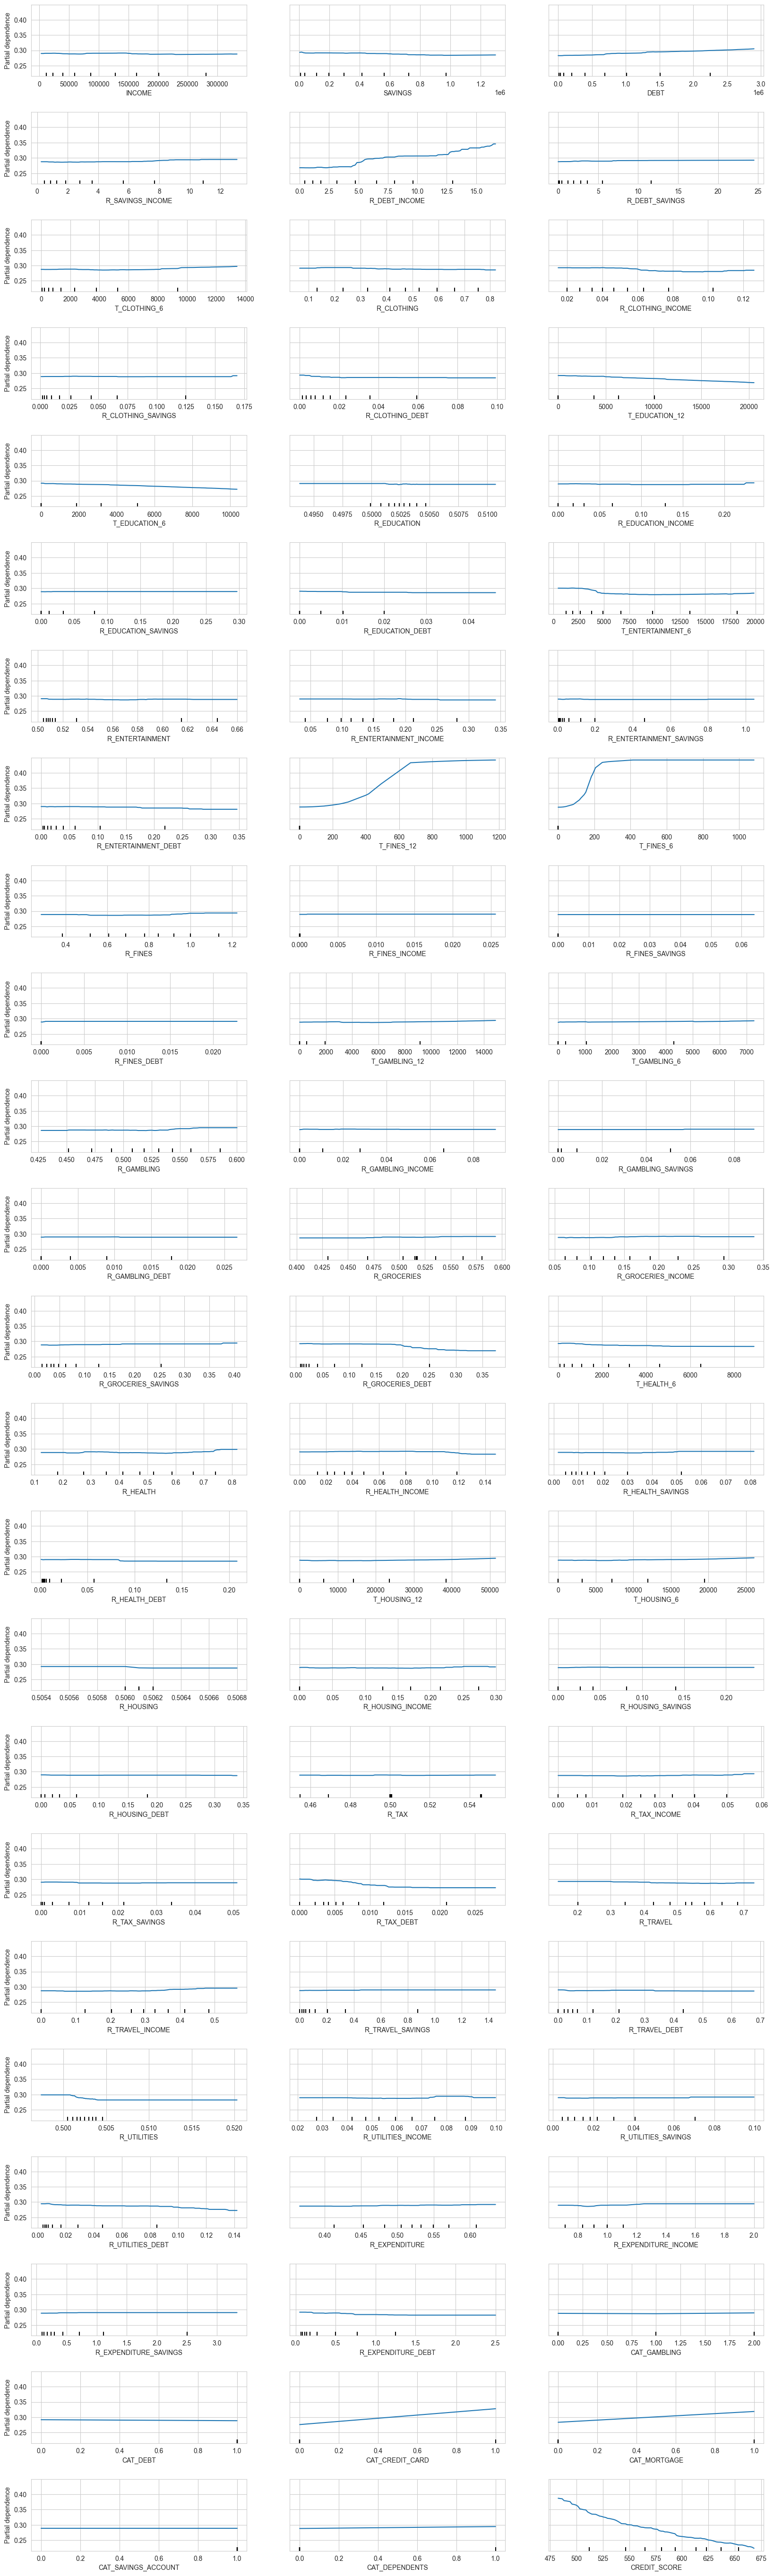

In [24]:
model_tpot = TPOTClassifier(generations=5, population_size=50, verbosity=2, random_state=42)
model_tpot.fit(X_train, y_train)

fig, ax = plt.subplots(figsize=(20, 70))
PartialDependenceDisplay.from_estimator(model_tpot, X_train, features=list(range(72)), feature_names=col, ax=ax)
plt.subplots_adjust(hspace=0.5)

Conslusions:
- there aren't many linear relationships between features and the model output (and for sure less than in the case of Naive Bayes)
- there aren't a lot of features that have a marginal impact on the model output - most of them have some impact (bigger or smaller)
- (once again) the most important feature is CREDIT_SCORE, which is consistent with XGBoost (but not with Naive Bayes), some of other important features are: CAT_CREDIT_CARD and mostly all of R_(name of category)_DEBT
- interestingly, CAT_SAVINGS_ACCOUNT, which was the most important in Naive Bayes, here has marginal impact